In [3]:
"""
Name: Ciaran Cooney
Date: 27/09/2018
Description: Notebook to load raw EEG data and create mne.RawArray.
Includes the addition of metadata to the mne object.
RawArray is plotted as are channel specific and averaged evoked potentials.
"""
import scipy.io as spio
import numpy as np
import pickle
import mne

#####Load data prior to ICA####
pickle_file = '..//..//imagined_speech/S01/pre_ica/imagined_words.pickle'
with open(pickle_file, 'rb') as f:
    file = pickle.load(f)
    #words_dataset = file['imagined_words']
    labels = file['imagined_labels']
    eeg_3d = file['imagined_eeg_3d']
    eeg_2d = file['imagined_eeg_2d']
    del file
    print('EEG 3D shape', eeg_3d.shape)
    print('EEG 2D shape', eeg_2d.shape)

EEG 3D shape (304, 6, 4096)
EEG 2D shape (6, 1245184)


In [4]:
sfreq = 1024
ch_names = ['F3', 'F4', 'C3', 'C4', 'P3', 'P4']
channel_types = ['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg']
Montage = '1020'
line_freq = 50
info = mne.create_info(ch_names, sfreq, channel_types)
info['line_freq'] = line_freq

print(info)

<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | F3, F4, C3, C4, P3, P4
    chs : list | 6 items (EEG: 6)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    line_freq : int | 50
    lowpass : float | 512.0 Hz
    nchan : int | 6
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 1024.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    buffer_size_sec : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    meas_date : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_layout : NoneType
>


In [5]:
custom_raw = mne.io.RawArray(eeg_2d, info)
print(custom_raw)

Creating RawArray with float64 data, n_channels=6, n_times=1245184
    Range : 0 ... 1245183 =      0.000 ...  1215.999 secs
Ready.
<RawArray  |  None, n_channels x n_times : 6 x 1245184 (1216.0 sec), ~57.0 MB, data loaded>


In [6]:
scalings = 'auto'  # Could also pass a dictionary with some value == 'auto'

custom_raw.plot(n_channels=6, scalings=scalings, title='Auto-scaled Data from arrays',
         show=True, block=True, color=dict(eeg='darkblue'), duration=4.0, clipping='clamp').show()

C:\Anaconda\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [7]:
# class labels
classes = ['Arriba', 'Abajo', 'Adelante', 'Atrás', 'Derecha', 'Izquierda']
event_id = dict(Arriba=6, Abajo=7, Adelante=8, Atrás=9, Derecha=10, Izquierda=11)

events = []
x = np.zeros((eeg_3d.shape[0],3))
for i in range(eeg_3d.shape[0]):
    x[i][0] = i
    x[i][2] = labels[i]
[events.append(list(map(int, x[i]))) for i in range(eeg_3d.shape[0])]
events = np.array(events)
print(eeg_3d.shape, len(events)) #(n_epochs, n_channels, n_times)

(304, 6, 4096) 304


304 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
<EpochsArray  |   304 events (all good), 0 - 3.99902 sec, baseline off, ~57.0 MB, data loaded,
 'Abajo': 51
 'Adelante': 51
 'Arriba': 51
 'Atrás': 51
 'Derecha': 51
 'Izquierda': 49>


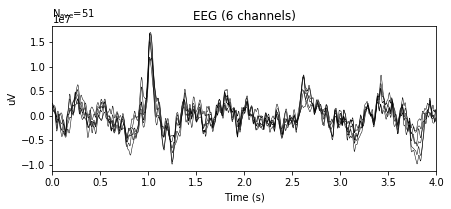

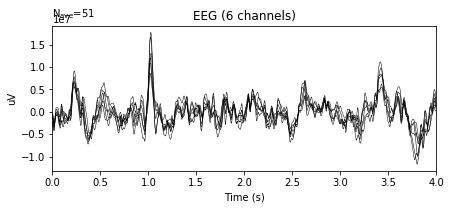

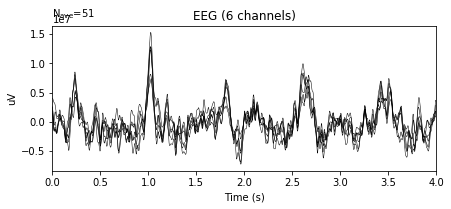

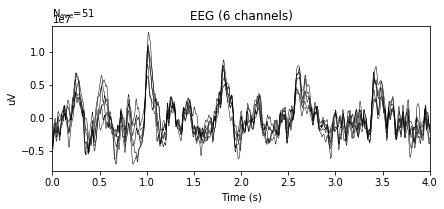

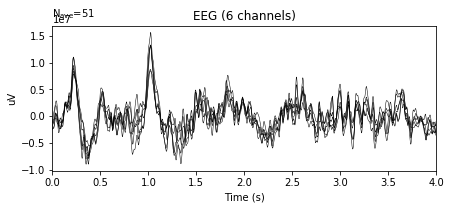

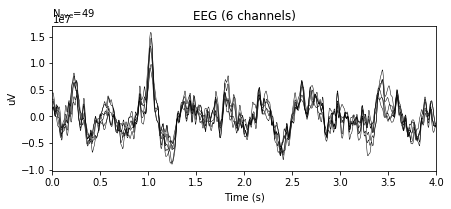

In [8]:
# Voltages for the 6 eeg channels averages across each class
tmin = 0 # may be a way to view stimulus onset response.
custom_epochs = mne.EpochsArray(eeg_3d, info, events, tmin, event_id)
print(custom_epochs)
for cls in classes:
    _ = custom_epochs[cls].average().plot(time_unit='s')

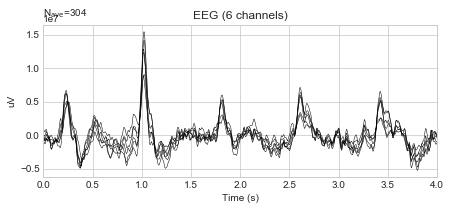

In [9]:
# 6 channels averaged across all 304 epochs.
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style # style.available
style.use('seaborn-whitegrid')
data_evoked = eeg_3d.mean(0)

nave = eeg_3d.shape[0]

comment = 'Imagined Speech'
evoked_array = mne.EvokedArray(data_evoked, info, tmin,
                               comment=comment, nave=nave)
_ = evoked_array.plot(time_unit='s')